# Detecting disinformation on the internet

**How effective are classical machine learning algorithms at detecting "fake news" articles across the web?**


### Contents

1. Introduction 
 - Area of focus
 - Comparing models
 - Text classification

2. Data
 - Sources
 - Caveats

3. Aims and objectives
4. Data imports
5. Method
    - Sourcing data
    - Data checks
    - Cleaning new data
    - Combining data
    - Feature engineering
        - Test preprocessing
        - Vectoring text
            - TF-IDF
            - Cosine similarity
        - Hapax scores
        - Part of speech analysis
        - Dimensionality reduction
    - Model selection
        - Training and testing sets
        - Creating a baseline model - Multinomial NB
        - Logistic Regression
        - Random Forest
        - Support Vector Machine
        - K-nearest Neighbours
    - Model evaluation
6. Conclusion
 - Outcomes
 - Findings
 - Limitations
 - Future research


## 1. Introduction

Over the past decade, disinformation — formally a topic of conversation for academics researching information warfare and similar subjects — has entered the public sphere.  Known by several names, most notably "fake news," the concept is simple: intentionally mislead others into believing ideas that are propagated on the internet.

Since Brexit in 2016 and Donald Trump's unexpected ascension to the top seat in the White House, websites whose primary focus is hyper-partisan disinformation have sprung up and out of the dark corners of the internet. The massive growth in disinformation has grown out of our proclivity for seeking out information that aligns with our belief systems [1]. An already politically divided world provided a perfect breeding ground for "alternative facts," as they have also been called.

Traditionally, claims such as these have been checked by watchdog fact-checking organisations such as Snopes and Politifact. These websites take a suspicious claims from a website or social media that has been circulated widely across the internet and either debunk it or classify it as true. However, the majority of the work done by these sites is manual, requiring journalists and fact-checkers to assess the authenticity of the claims.

In 2019, Del Vicario et al. wrote that science now faces the challenge of finding ways to help news consumers to gather "trustworthy information" in order to "participate meaningfully in public debates and societal decision-making."[3]

Novel technologies such as those used by data scientists have in some cases proven to be effective tools in detecting and flagging these types of articles. Nevertheless, the majority of open source projects I have seen focusing on this use article headlines to detect whether an article is fake or not.



### Area of focus

In my project proposal, I scraped articles from renowned fake news websites to analyse and assess the viability of using text data from the articles to detect disinformation. I concluded that this would be possible.

For this project, I will be using natural language processing (NLP) techniques to engineer text data from these articles into a form that can be used by machine learning (ML) algorithms to classify articles as disinformation or as trustworthy.

Given the variability in the length of the articles I originally scraped, the dataset will need to enhanced by including additional fake news samples from other websites. 

In addition, I will be employing several ML algorithms in an attempt to assess which algorithm works best in classifying fake news text. During this step, each of the models (more detail later on) will be trained on the set of data. I will be selecting five classical machine learning algorithms to undertake this task.

### Text classification

Computers are adept at dealing with problems that involve numbers but have a tougher time dealing with text. Unlike tabular data or data that is numerical in nature, text data is unstructured, making it notoriously difficult to analyse. As a result, text classification is an important focal point among NLP researchers.

Classifying text involves taking text data, such as an article, as an input and assigning it a label, or grouping. The idea is that similar groups ot text will be assigned the same label, thereby classifying them.

Text classification falls under supervised machine learning. In order for an ML model to learn how to correctly predict labels for text data it hasn't encountered, it needs to be trained on many examples of text along with their associated labels. For this project, we will be training models to categorise articles into two categories: real and fake. This is a binary text classification problem.

Classifying text is a "task of fundamental importance" with applications ranging from "information retrieval [and] topic labelling [to] sentiment analysis."[2]

Stressing the importance of text classification, Gasperetto et el wrote "the speed at which textual information is currently being created has long outclassed manual solutions to these tasks, meaning that [text classification] methods are not only useful, but also strictly necessary."


## 2. Data

### Sources

In my project proposal, I scraped data from five well-known fake news websites. These sites are:

1. [City World News](http://cityworldnews.com)
2. [Before It's News](https://beforeitsnews.com)
3. [Daily Buzz Live](http://dailybuzzlive.com)
4. [21st Century Wire](https://21stcenturywire.com)

These sites were randomly selected from the sources of the [FakeNewsCorpus](https://github.com/several27/FakeNewsCorpus/blob/master/websites.csv). The dataset used http://www.opensources.co/ (now defunct) as a guide in choosing which websites to include.

In addition to the above four websites, I will be scraping two more. After further analysis of my original data I found that a significant number of the articles I scraped were less than 50 words. In order to make sure that the models I train are as effective as possible I will be including articles of similar length. In order to do this, I will be filtering out all the shorter articles from my original dataset and replacing them with articles the following websites:

1. [Investment Watch](https://www.investmentwatchblog.com)
2. [News Punch](https://newspunch.com)

For a source of reliable news articles, I will be using a corpus of BBC articles from Kaggle. As I mentioned in my project proposal, I initially wanted to scrape the websites of several reliable news websites but was unable to get permission. Given the historically litigious nature of some of these news organisations when it comes to web scraping, I thought that using this existing dataset would be a safer option.

### Data caveats

Despite my best efforts, I have not been able to create a corpus of fake and reliable news articles that is as balanced as I would have liked. This may have an effect on the performance of the algorithms I will be using to classify the news articles. The problems that may arise are:

1. The BBC corpus covers a wide range of topics from sport to politics to science. Meanwhile, the fake news dataset may not have the same variation in subjects.
2. The fake news corpus is likely to contain a lot more variability given that it comes from different sources. Sites that do not have strict style rules may not, for example, have hard upper and lower limits on word count or a standardised "voice" that is created as a result of employing a team of copy editors and subeditors. 


## 3. Aims and objectives

The aim of this project is to gauge how effective the combination of NLP and several popular classical machine learning algorithms are in classifying fake and reliable news. I am intentionally avoiding neural nets, which are thrown at any and all problems these days. I will be taking the following steps during in this project:

1. Scrape additional text data to accentuate the data I acquired in my project proposal
2. Clean the newly scraped data
3. Engineer the features of the data, so they can be used as an input to train several classification models
4. Train the models
5. Use several classification metrics and visualisations to assess the efficacy of each of the trained models

## 4. Imports

In [1]:
# Data acquisition
from bs4 import BeautifulSoup
import requests
import json

# Writing and reading data
from os.path import exists

# Cleaning
import unicodedata
import re

# Preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from collections import Counter


# Analysis
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_selection import VarianceThreshold

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, roc_auc_score


# Unit tests
import unittest

# Set matplotlib style
plt.style.use('fivethirtyeight')


Ensure you have the entire NLTK library

In [ ]:
nltk.download()

## 5. Method

### Sourcing data

Since the majority of the data has already been scraped, it will need to be imported into this notebook. However, there are two additional websites that will need to be scraped and the data will need to be cleaned. I will be including the code to scrape and clean data as functions so that it can be reused for different data sources.

#### Define helper functions for scraping

**Please note that I have create functions for most operations to avoid polluting the global namespace as much as possible. These functions were created in my project proposal.**

The function below pulls the html from a specified URL and returns a BeautifulSoup object [9].

In [2]:
def get_html(URL, jar=None):
    """
    Get the HTML of the given URL.
    :param URL: URL to get HTML from
    :return: Soup object of the URL
    """
    request_header = {"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36"}

    try:
        response = requests.get(URL, headers=request_header, timeout=10)
        
    except (requests.ConnectionError, requests.Timeout, requests.RequestException, KeyboardInterrupt) as e:
        print(e)
    
    # If the request is not successful return the error code
    if response.status_code != 200:
        return f"Error: Status code {response.status_code}"
    else:
        data = response.text
    
    soup = BeautifulSoup(data, "html.parser")
    return soup
    

The function below is used to get the name of the site when running the scraping functions [9].

In [10]:
def get_site_name(data):
    """
    Gets the name of the publication from the site being scraped for later use.
    :param data: data dictionary from which to pull the site name
    :return: Name of the website
    """
    return data[0].get("source")

The function below pulls the urls of the articles on a given page [9].

In [4]:
def get_article_urls(soup, element, selector, selector_value):

    """
    Get the URLs of all articles on the given page.
    :param soup: BeautifulSoup object
    :param element: HTML element you want to select
    :param selector: The selector or attribute you want to select
    :param selector_value: The value of the selector or attribute
    :return: list of URLs
    """
    # Gets all elements containing links to articles
    links = soup.find_all(element, {selector: selector_value})
    # Extract the links
    article_urls = [link.find("a")["href"] for link in links]
    
    return article_urls

The function below stores scraped URLs as dictionaries.

In [5]:
def make_url_dict(url_list):

    """
    Create a list of dictionaries containing the urls.
    :param url_list: list of scraped urls
    :return: List of dictionaries containing URLs
    """

    return [{'url': url} for url in url_list]


The function below takes the scraped data and writes it to the filesystem [9].

In [6]:
def write_json(filename, content):
    """
    Takes an object and writes it to the filesystem
    :param filename: Name of the file to write content to
    :param content: Python object to write to file system
    :return: File written to the filesystem
    """
    # Check if file exists - this returns a boolean
    file_exists = exists(filename)
    
    # If the file exists raise an issue
    if file_exists:
        print('File exists! Choose another filename if you want to write the file again.')
        return 
    else:
        with open(filename, "w", encoding='utf8') as f:
            json.dump(content, f, indent=4)
        print("Data written to file")


### Scraper unit tests

Below are the unit tests for the scraper functions. I decided to include tests here as the scraping process is where most of the errors could occur.

In [164]:
class ScrapeTests(unittest.TestCase):

    # Method to get data  - so no need to rewrite below
    def get_data(self):
        return get_html('https://newspunch.com/')

    # Method to extract URLS from page - otherwise would need to be rewritten multiple times below
    def get_urls(self):
        return get_article_urls(self.get_data(), "h3", "class", "entry-title")

    # Check that get_html does not return None
    def test_return_not_none(self):
        self.assertIsNotNone(self.get_data())

    # Test to see that get_html returns a soup object
    def test_return_soup(self):
        # scraped = get_html('http://www.google.com')
        self.assertIsInstance(self.get_data(), BeautifulSoup)

    # Check that the soup object returned from get_html contains html content
    def test_soup_contains_content(self):
        # scraped = get_html('http://www.google.com')
        self.assertGreater(len(self.get_data().find('body').text), 1)

    # Check that get_article_urls returns a list
    def test_returns_urls_type(self):
        self.assertIsInstance(self.get_urls(), list)

    # Check that the list returned from get_article_urls has a length > 0
    def test_returns_list_with_len(self):
        self.assertGreater(len(self.get_urls()), 0)

    # Check to see that all URLs returned from get_article_urls are valid
    def test_urls_valid(self):

        # Pattern for http and https URLs
        pattern = "^https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)$"
        urls = self.get_urls()

        # Returns a list of True booleans if all URLs are valid
        matched = [bool(re.match(pattern, url)) for url in urls]

        # If all URLs are valid, the length of the url variable should ve equal to the sum of the True booleans in matched
        self.assertEqual(len(urls), sum(matched))

unittest.main(argv=['ingored', '-v'], exit=False)


test_return_not_none (__main__.ScrapeTests) ... ok
test_return_soup (__main__.ScrapeTests) ... ok
test_returns_list_with_len (__main__.ScrapeTests) ... ok
test_returns_urls_type (__main__.ScrapeTests) ... ok
test_soup_contains_content (__main__.ScrapeTests) ... ok
test_urls_valid (__main__.ScrapeTests) ... ok

----------------------------------------------------------------------
Ran 6 tests in 9.067s

OK


#### Define scrapers for each of the new websites

We now need to define the scraping logic for the two sites we want to get data from. Both of these functions are constructed the same way. First, we pull all the article URLs that we need from the site, and then we visit each one of those URLs to extract the textdata. Once all the article content has been pulled, we save all the articles in a JSON file, with each file representing one website. The helper functions defined above are used to construct the scraping logic for each publication.

In [7]:
def scrape_investment_watch():
    
    """
    Scrapes Investment Watch articles.
    :return: None, saves data to filesystem
    """
    
    url =  "https://www.investmentwatchblog.com/"
    
    # Instantiate a store for all the URLs
    urls = []
    # Define how many pages we want to scrape
    number_of_pages = 5
    
    # For each of the pages, get the HTML, extract the URL for each article, and save it in the urls variable
    for i in range(1, number_of_pages, 1):
        soup = get_html(f"{url}/page/{i}/")
        article_urls = get_article_urls(soup, "h2", "class", "entry-title")
        urls.extend(article_urls)

    # Define a list in which to store article data - each article will be stored in a dictionary
    content = []
    
    # For each URL, get the HTML, and extract the title and text
    for url in urls:
        soup = get_html(url)
        header = soup.find("h1").text
        body = soup.find("div", {"class": "entry-content"})
        if body.findAll('p', recursive=False) is not None:
            body_text = " ".join([str(p.text) for p in body.findAll("p", recursive=False)])
        else: return 
        content.append({ "header": header, "body_text": body_text, "source": "Investment Watch", "class": "fake"})
    
    # Check that the data has been collected
    print(f"Data collected successfully from {get_site_name(content)}")

    # Save the URLs as a json file
    write_json('investmentWatchUrls.json', make_url_dict(urls))

    # Save the data as a json
    write_json("investmentWatch.json", content)


In [8]:
def scrape_news_punch():
    
    """
    Scrapes News Punch articles.
    :return: None, saves data to filesystem
    """

    url =  "https://newspunch.com/"
    
    # Instantiate a store for all the URLs
    urls = []
    # Define how many pages we want to scrape
    number_of_pages = 5
    
    # For each of the pages, get the HTML, extract the URL for each article, and save it in the urls variable
    for i in range(1, number_of_pages, 1):
        soup = get_html(f"{url}/page/{i}/")
        article_urls = get_article_urls(soup, "h3", "class", "entry-title")
        urls.extend(article_urls)
    
    # Define a list in which to store article data - each article will be stored in a dictionary
    content = []
    
    # For each URL, get the HTML, and extract the title and text
    for url in urls:
        soup = get_html(url)
        header = soup.find("h1").text
        body = soup.find("div", {"class": "entry-content"})
        if body.findAll('p', recursive=False) is not None:
            body_text = " ".join([str(p.text) for p in body.findAll("p", recursive=False)])
            content.append({ "header": header, "body_text": body_text, "source": "News Punch", "class": "fake"})
        else: return
        
    
    # Check that the data has been collected
    print(f"Data collected successfully from {get_site_name(content)}")

    # Save the URLs as a json file
    write_json('newsPunchURLs.json', make_url_dict(urls))
    
    # Save the data as a json
    write_json("newsPunch.json", content)

#### Running scrapers to pull in data

We can now use the scrapers above to pull in the text data from the news websites. I have already run this code so the corpus has already been built and saved to the filesystem, so I will leave the code below commented out as it can time some time to run.

In [11]:
# scrapers = [scrape_investment_watch, scrape_news_punch]
#
# for scraper in scrapers:
#     scraper()


Data collected successfully from Investment Watch
Data written to file
Data written to file
Data collected successfully from News Punch
Data written to file
Data written to file


### Data checks

Now that the text data is downloaded, we should check it for any unexpected values and errors in the scraping process. The scraper functions above each save a file containing URLs for each website. We can use these variables to check that all articles have been scraped and that all articles contain content.

Additionally, we will need to import the processed dataset from my project proposal and run diagnostics on it. Due to some issues with my previous scraping functions, there is some missing data in the dataset. I will need to check what proportion of the dataset contains missing or null values.

First, we need to import the newly scraped data that was saved to the filesystem into a simple data structure that will allow us to run tests on it to see that the data has been scraped successfully.

We only want to return articles that have more than a threshold number of words. This threshold is defined below.

In [2]:
# Create a threshold for the minimum article length
WORD_THRESHOLD = 25

In [3]:
# This code reads the scraped data into the notebook. It creates a dictionary with publication names as keys. 
# This allows us to search for publication names using the syntax data[publicationName].
data = {}
files = ['investmentWatch.json', 'newsPunch.json']

for file in files:
    with open(file, "r") as f:
        json_file = json.load(f)
        name = file.split(".")[0]
        data[name] = json_file
        f.close()

# Load files containing URLs - these are created during the scraping process
investment_watch_urls = pd.read_json('investmentWatchURLs.json')
news_punch_urls = pd.read_json('newsPunchURLs.json')


Now, we run the body text of the article through a function that checks whether the data was scraped correctly and highlights problematic samples to check.

In [4]:
def check_scraped_data(publication, publication_urls):
    
    """
    Runs checks on scraped data.
    :param publication: List of dictionaries containing article data
    :param publication_urls: List of urls scraped from a specified publication
    :return: Stats related to data pulled for a specified publication
    """
    
    # Get the total number of scraped articles and scraped urls
    pub_len = len(publication)
    url_len = len(publication_urls)

    # Convert publication urls dataframe to list
    publication_urls_list = publication_urls['url'].tolist()
    
    # Get the number of words in each article
    article_lengths = []

    for article in publication:
        body = article.get('body_text')
        words = body.split(" ")
        article_lengths.append(len(words))
        
    # Number of articles with fewer than the threshold number of words
    # Get a boolean array of articles with fewer than the threshold number of words
    article_missing_boolean = [i <= WORD_THRESHOLD for i in article_lengths]
    
    # Get number of articles with less than ten words
    flag_articles = sum(article_missing_boolean)
    
    # Get the index of the articles that contain fewer than ten words
    article_missing_index = [i for (i, value) in enumerate(article_missing_boolean) if value]
   
    # Use the indices to return the header of articles with fewer than wo words                 
    headers = [article.get('header') for (i, article) in enumerate(publication) for j in article_missing_index if i==j]
    header_urls = [value for (i, value) in enumerate(publication_urls_list) for j in article_missing_index if i == j]

       
    scraped_len = 'the same number of articles as' if pub_len == url_len else f"{url_len - pub_len} fewer articles than"

    line_break = '\n'     
    return f"The scraped data from {publication[0].get('source')} contains {scraped_len} the number of urls. There are {flag_articles} articles that contain fewer than 10 words. The urls for these articles are {header_urls if len(header_urls) >= 1 else None}"

In [5]:
print(check_scraped_data(data['newsPunch'], news_punch_urls), end='\n\n\n')
print(check_scraped_data(data['investmentWatch'], investment_watch_urls))


The scraped data from News Punch contains the same number of articles as the number of urls. There are 0 articles that contain fewer than 10 words. The urls for these articles are None


The scraped data from Investment Watch contains the same number of articles as the number of urls. There are 39 articles that contain fewer than 10 words. The urls for these articles are ['https://www.investmentwatchblog.com/deals-on-used-cars-are-coming/', 'https://www.investmentwatchblog.com/putting-the-world-economic-forum-out-of-business/', 'https://www.investmentwatchblog.com/the-economist-cover-shows-great-chaos-and-evil-coming-to-the-uk/', 'https://www.investmentwatchblog.com/no-mortgage-insurance-requirement-no-income-information-no-stress-test-just-2008-on-steroids/', 'https://www.investmentwatchblog.com/the-guy-running-for-senate-against-dr-oz-is-a-vegetable-can-no-longer-speak-after-stroke-worse-than-joe/', 'https://www.investmentwatchblog.com/ron-johnson-the-covid-cartel-probably-cost-hundr

You will notice that there are some issues with data pulled from Investment Watch. If you click on the links that are outputted you will find that this is because of several reasons:

- The article only contain images with no text.
- The article only contains embedded YouTube videos with no text.
- The article only contains images and embedded YouTube videos and no text.

In all scenarios, the scraped data contains nothing useful that can be used unless we incorporate optical character recognition (OCR) and speech-to-text functionality, which is far beyond the scope of this project. As a result, we will omit samples in which there is no text during the cleaning and processing phase of the data transformations.

#### Check previously scraped data

As already mentioned, there are some issues with the previously scraped data. When I set up the scraping functions in my project proposal I did not run checks to see if there was article text associated with every article I scraped. Like in the newly scraped articles, there are instances in which there is video or imagery in an article but no text. I'll run a similar checks as above on the previously scraped data. Unfortunately, I won't be able to get the URLs for each of the articles as this dataset does not contain them.

In [7]:
# Import previously scraped data
previously_scraped_fake = pd.read_csv('full-fake-news-data.csv')

# Import dataset of real articles
full_real = pd.read_csv('BBC News Train.csv')

In [8]:

def check_previously_scraped(dataframe):

    """
    Runs checks on previously scraped data.
    :param dataframe: Pandas dataframe of previously scraped data
    :return: Stats related to data pulled for each publication
    """

    # Set up a mask to find data in which body_text is missing
    na_mask = dataframe['body_text'].isna()

    # Get total number of missing entries
    missing_entries = na_mask.sum()

    # Get missing data
    missing_entries_data = dataframe[na_mask]

    # Get not missing data
    not_missing_data = dataframe[~na_mask]

    # Split each article into lists of words
    word_tokens = not_missing_data['body_text'].str.split()

    # Create a Boolean array returning True for all articles that are longer than 10 words
    word_boolean = word_tokens.map(lambda x: len(x) <= WORD_THRESHOLD)

    # Calculate total number of articles with fewer than 10 words
    less_threshold_entries = sum(word_boolean)

    # Na and less_10_mask
    na_less_threshold = (na_mask + word_boolean).astype(bool)

    # Mask the dataframe to only return articles with less than 10 words
    subset_entries_data = dataframe[na_less_threshold]

    # Get list of publications from th dataset
    publications = subset_entries_data['source'].unique()

    # Calculate the number of missing articles for each publication
    missing_by_pub =  {source: len(subset_entries_data[subset_entries_data.source == source]) for source in publications}

    # Get the headlines of each missing article and sort by publication
    missing_pub_headlines = {source: subset_entries_data[subset_entries_data.source == source].header.values.tolist() for source in publications}

    print(f"There are a total of {missing_entries + less_threshold_entries} articles with fewer than {WORD_THRESHOLD} words.")
    print('\n')

    for pub in publications:
        print('----------------------------------------------------------------------------------')
        print(f"{pub} has {missing_by_pub[pub]} articles with fewer than {WORD_THRESHOLD} words.", end='\n')
        print(f"The articles with the following headlines don't have any text: {missing_pub_headlines[pub]}")
        print('\n')
        print('----------------------------------------------------------------------------------')
        
    print('The following indices have no associated body_text and can be removed later')    
    print(subset_entries_data.index)

Check the data that was scraped previously

In [9]:
check_previously_scraped(previously_scraped_fake)

There are a total of 56 articles with fewer than 25 words.


----------------------------------------------------------------------------------
21st century wire has 2 articles with fewer than 25 words.
The articles with the following headlines don't have any text: ['dr. fauci launches the great omicroin declaration!', 'babylon bee  the best sketches of 2021']


----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
daily buzz live has 18 articles with fewer than 25 words.
The articles with the following headlines don't have any text: ['i do a thing called what i want', 'you dont like me but still watching', 'man records some creepy af noises coming from the woods near his home', 'nurse faints after receiving covid vaccine', 'kitten wants to play, dog wants to nap!', 'signs that humanity is getting dumber', 'the actual voices of black slaves recorded now revealed', 'woman head

### Removing null values from the datasets

We have now identified where the issues are with our scraped data. Since, for the most part, we understand why these issues have arisen we can remove the samples in which the missing data occurs for both the newly scraped and previously scraped data. To do this we can just drop the null values from the previously scraped dataset. For the newly scraped dataset, we will import it into Pandas, changing it from a Python dictionary into a dataframe. This will make the processing a little easier and will allow us to easily combine these two sets of data later on.

#### Previously scraped data

For previously scraped data we need to remove articles with no text, and we need to remove articles with fewer than the threshold number of words we set earlier. The function below handles that.

In [10]:
def drop_previously_scraped(previously_scraped_df):
     
    """
    Creates a Pandas dataframe with articles containing more than 10 words.
    :param previously_scraped_df: Pandas dataframe of scraped data
    :return: Pandas dataframe in which all articles are more than 10 words long
    """

    # Drop null values 
    dropped_na = previously_scraped_df.dropna(subset='body_text')

    # Split each article into lists of words
    word_tokens = dropped_na['body_text'].str.split()

    # Create a boolean mask of articles with fewer than 10 words
    lengths = word_tokens.map(lambda x: len(x) <= WORD_THRESHOLD)

    # Subset and return
    return dropped_na[~lengths].reset_index(drop=True)

    

In [11]:
previously_scraped_dropped = drop_previously_scraped(previously_scraped_fake)

The function below will be used to check how many entries have been dropped from a dataframe.

In [12]:
def verify_dropped_data(new_df, old_df):

    """
    Runs checks to ensure that the number of dropped articles aligns with calculated values.
    :param new_df: Pandas dataframe after dropping null values
    :param old_df: Pandas dataframe with missing values
    :return: String containing number of dropped articles
    """
    return f"A total of {len(old_df) - len(new_df)} articles with no content have been dropped"

A total of 56 entries should have been dropped according to our calculations. We can verify this with the verification function I created above.

In [13]:
verify_dropped_data(previously_scraped_dropped, previously_scraped_fake)

'A total of 56 articles with no content have been dropped'

#### Newly scraped data

We can apply the same process to the newly scraped data. However, we first need convert the list of dictionaries containing the scraped data into a dataframes on which we can run computations easily.

In [14]:
investment_watch_df = pd.DataFrame(data['investmentWatch'])
news_punch_df = pd.DataFrame(data['newsPunch'])

newly_scraped_fake = pd.concat([investment_watch_df, news_punch_df], axis=0)

In [15]:
def drop_newly_scraped(newly_scraped_df):

    """
    Creates a Pandas dataframe with articles containing more than 10 words.
    :param newly_scraped_df: Pandas dataframe of scraped data
    :return: Pandas dataframe in which all articles are more than 10 words long
    """

    # Split all articles into lists of words
    targets = newly_scraped_df['body_text'].str.split(" ")

    # Create a boolean mask that returns True if there are fewer than 10 words in the article
    length_mask = targets.map(lambda x: len(x) <= WORD_THRESHOLD)

    # Subset and return all articles with more than 10 words
    return newly_scraped_df[~length_mask].reset_index(drop=True)

In [16]:
# Drop all articles under the word threshold
newly_scraped_dropped = drop_newly_scraped(newly_scraped_fake)

According to previous calculations a total of 39 articles should have been dropped for containing fewer than 10 words.

In [17]:
verify_dropped_data(newly_scraped_dropped, newly_scraped_fake)

'A total of 39 articles with no content have been dropped'

### Cleaning text data

#### Cleaning fake news datasets

In order to effectively create a classification model to categorise real and fake news articles we need to clean the newly scraped text data. This process has already been completed for the previously scraped data. For the sake of consistency, I will be using similar code to complete this process. The function below conducts general text cleaning. It removes all uppercase letters, URLs, unicode, multiple spaces, and punctuation. The idea is to standardise the text as far as possible.

In [18]:
def clean_text(text):
    """
    Cleans up text in individual articles.
    :param text: Text string
    :return: Text string
    """
    # Make every word lowercase
    text = text.lower()

    # Remove unicode
    text = unicodedata.normalize("NFKD", text).encode('ascii', 'ignore').decode("utf-8")

    # Remove URLs
    text = re.sub(r'https*\S+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r" +", " ", text)

    # Remove punctuation
    text = text.translate(str.maketrans('','', string.punctuation))

    
    return text.strip()

In [19]:
def apply_text_cleaning(dataset):
    
    """
    Applies the clean_text function to a full dataset.
    :param dataset: Pandas dataframe
    :return: Pandas dataframe
    """

    # Create a copy of the input dataframe
    df_copy = dataset.copy()


    # Apply text cleaning to the body_text feature
    body_text = df_copy['body_text'].apply(clean_text)

    # Replace original feature with transformed ones
    df_copy.loc[:, 'body_text'] = body_text

    # Drop the header column and return the dataframe
    return df_copy.drop('header', axis=1)

Now, we can run all three datasets through the text cleaning function to standardise the data. We can then take a look to see if data from individual publications needs special treatment.

In [20]:
old_fake = apply_text_cleaning(previously_scraped_dropped)
new_fake = apply_text_cleaning(newly_scraped_dropped)

#### Cleaning dataset of reliable news

The dataset of reliable news needs to be transformed before it can be cleaned in oder to bring it in line with the format of the fake news dataset. We only need a subset of the columns, we also need to add BBC as the source publication, and we need to add the 'real' class to each of the samples. The functions below with achieve this.

In [21]:
def format_real_text(text):

    """
    Remove space between big numbers
    :param text: Test as a string
    :return: Text as a string
    """ 

    return re.sub(r"(?<=\d)\s+(?=\d|\-)", "", text)

In [22]:
def transform_real_data(real_raw_df):

    """
    Transforms the real news dataset into the same format as the fake news sets`.
    :param real_raw_df: Pandas dataframe
    :return: Pandas dataframe
    """
    # Select the column we want to subset
    target_columns = ['Text']
    df = real_raw_df[target_columns].copy()

    # Apply to real class to the dataframe
    df.loc[:, 'class'] = 'real'

    # Apply data source to dataframe
    df.loc[:, 'source'] = 'BBC'

    # Rename columns
    df.columns = ['body_text', 'class', 'source']

    # Large numbers have a space in them - remote than
    df.loc[:, 'body_text'] = df.body_text.apply(format_real_text)
    
    return df
    

In [23]:
# Apply the transformation
old_real = transform_real_data(full_real)

### Combining data

Now that the basic cleaning is done, we can combine the smaller datasets into one larger one so that further processing can be done at once. Vectorisation will need to be done on the full corpus of fake and real articles, rather than on individual subsets of the overall data.

In [24]:
full_data = pd.concat([old_fake, new_fake, old_real], axis=0).reset_index(drop=True)

### Feature engineering

An important step in the text processing pipeline is feature engineering, which includes additional processing steps that will help machine learning algorithms identify the underlying patterns in the data. Feature engineering can be complex when just simple numerical and categorical features are used. It becomes a lot more intricate when dealing with text data. 

The field of natural language processing (NLP) is well-studied and has established several best practices for dealing with text data. NLP aims to give "computers the ability to understand text and spoken words in the same way that human beings can."[4]

NLP is the culmination of computational linguistics, machine learning, and deep learning. It allows for processes like machine translation, speech to text, text to speech, and chatbots. It's also the field that makes text classification possible, particularly when preprocessing a corpus before converting it to numerical vectors (which we will get to later) to use as inputs to an ML model.


#### Text preprocessing

In the process of engineering the features of the dataset, we will start off with the preprocessing phase. This entails removing redundant information from the text, and can be done is several ways:

1. Breaking down articles into lists of words. This process, known as tokenisation, provides a way to look at each word on its own and run computations and transformations on it.

2. Removing common words that don't contribute to the meaning of a sentence or text. Known as stopwords, they include words such as "the", "a", "we", and "our", etc. Not only does this remove a lot of information we don't need, it will help to prevent overfitting and help generalisation as the model will be simpler than one that learns from data that is polluted with a lot of noise. These words come predefined in NLTK, a popular NLP module in Python. A word's inclusion in the list of stopwords is determined by the number of times the terms appear in a corpus. The more frequently occurring terms in a language are added to the stoplist, with the logic being that if a words appears often it should hold less meaning in the overall document.

3. Reducing words to their base form. For text classification tasks we want to simplify a corpus of text as much as possible. Lemmatistaion provides a way to do this by reducing words to their base form. As a result, the same word in its different forms won't be seen as completely different words. For example, during the lemmatisation process, words like "playing", "played", and "play" would all be output as "play".

Below, we will define a function that implements these steps:

In [25]:
# Instantiate the lemmatiser
lemmatiser = WordNetLemmatizer()

# Instantiate the list of stopwords
stops = stopwords.words('english')

# Remove punctuation from stop words since our corpus has already had it removed
stops = [stop.translate(str.maketrans('','', string.punctuation)) for stop in stops]

In [26]:
def preprocess_text(text):

    """
    Tokenises, lemmatises, and removes stopwords.
    :param text: Test as string
    :return: List of strings
    """

    # Tokenise the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in stops]

    # Lemmatise the tokens
    tokens = [lemmatiser.lemmatize(token) for token in tokens]

    return tokens


Apply test preprocessing to the full dataset

In [27]:
full_data['processed'] = full_data['body_text'].apply(preprocess_text)

#### Text vectorisation

As already mentioned, computers are very good at dealing with numbers but are not adept at dealing with text. Given this shortcoming, we will need to convert all documents in the corpus into numerical vectors, a process known as vectorisation.

**Term frequency**

There are several ways to do this. The first is known as term frequency. Term frequency is the frequency of each word in the corpus of text we are using. The metric is calculated by working out how many times a word appears in a document and dividing by the total number of words in the document. This will normalise the figure based on document length. Each document in a corpus fill have its own term frequency. The term frequency for a term t in document d is given by:

$$ tf(t, d) = \frac{\text{number of times the word t appears in document d}}{\text{the number of words in document d}} $$

**Term frequency Inverse Document Frequency**

However, there are better implementations of vertorising that take words, in their documents, and compare them to an entire corpus. Term frequency tells you how important a word is in a single document but not necessarily across a corpus of documents. Instead, we can use Term Frequency Inverse Document Frequency (TF-IDF). The method is based on Zipf's Law, which broadly can be interpreted as a word's importance is inversely proportional to the number of times it occurs[5]. TF-IDF uses this concept to rank a word's importance.

The second part is the inverse document frequency, which is given by:

$$ idf(t, d, D) = \frac{\text{the number of documents in corpus D}}{\text{the number of documents d term t appears in  }}$$

Then, the TF-IDF is given by: $$ tfidf = tf * idf $$

For each article, an n-sized vector will be created, where n is the number of unique words in the entire corpus (in this case, all the articles in the dataset). The words that appear in a particular article will be given a TF-IDF score, while words that don't appear in an article but appear in others will be represented by a zero.

We can now create TF-IDF vectors for each of the articles in the dataset and append these vectors to the already existing data.

In [28]:
def vectorise_text(dataset, target_column):

    """
    Vectorises tokenised text using TF-IDF.
    :param dataset: Pandas dataframe
    :param target_column: Column (Pandas series) in which tokenised data is contained
    :return: Dataframe with vectorised text
    """

    # Copy the DataFrame
    new_df = dataset.copy()

    # Instantiate the vectoriser
    tfidf_vectoriser = TfidfVectorizer()

    # Convert articles to strings instead of lists of words
    joined_text = [" ".join(text) for text in new_df[target_column]]

    # Apply vectorisation to text
    vectorised_text = tfidf_vectoriser.fit_transform(joined_text).toarray()

    # Create output column names
    columns = [f"_{column}" for column in tfidf_vectoriser.get_feature_names_out()]

    # Create dataframe from vectorised text
    vector_df = pd.DataFrame(vectorised_text, columns=columns)

    # Join vector data to dataset
    return pd.concat([new_df, vector_df], axis=1)


In [29]:
# Apply vectorisation
full_data = vectorise_text(full_data, 'processed')

In [30]:
print(f"The new dataframe now contains {full_data.shape[1]} columns, each representing one world from the corpus.")

The new dataframe now contains 38068 columns, each representing one world from the corpus.


**Cosine similarity**

Another bit of feature engineering we can do is calculating the cosine similarity between each of the articles. This method allows us to get similarity scores between each of articles in the dataset. It is a common metric used in text classification.

Since the text is already vectorised we can use cosine similarity to calculate the cosine of the angle between the two vectors. Cosine similarity gives us an idea of whether the vectors are pointing the in the same direction, which indicates higher similarity. The smaller the angle between each of the vectors that represent the articles, the more similar the articles.[6] This enables us to find metrics that can assign similarity even if the articles are not similar in Euclidian space (i.e. large distance between vectorised articles).

Mhatre and Masurkar found in a study that using cosine similarity scores after a process of topic modelling could increase the accuracy of a classifier [6]. In this project, I won't be doing any topic modelling, but I will be attempting to use cosine similarity scores to improve the classifiers' performance.

In [31]:
def get_cosine_similarity(dataset, from_index):

    """
    Calculates and returns cosine similarity scores for each article in the dataset.
    :param dataset: Pandas dataframe
    :param from_index: index from which TF-IDF vectors start
    :return: Pandas dataframe with cosine similarity scores
    """

    # Create a copy of the dataframe
    df_copy = dataset.copy()

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(df_copy.iloc[:, from_index:])

    # Create column names for new dataframe
    columns = [f"cosine_similarity_{i}" for i in range(len(df_copy))]

    # Convert scores to dataframe
    scores_df = pd.DataFrame(similarity_scores, columns=columns)

    # Return joined dataframes
    return pd.concat([df_copy, scores_df], axis=1)

Process cosine similarity

In [32]:
full_data = get_cosine_similarity(full_data, 4)

In [33]:
full_data.head()

,body_text,class,source,processed,_00,_000,_0000020,_0000previousplayskipmutecurrent,_0001,_0003337,...,cosine_similarity_2739,cosine_similarity_2740,cosine_similarity_2741,cosine_similarity_2742,cosine_similarity_2743,cosine_similarity_2744,cosine_similarity_2745,cosine_similarity_2746,cosine_similarity_2747,cosine_similarity_2748
0,freddie ponton for those who were able to read...,fake,21st century wire,"[freddie, ponton, able, read, last, article, e...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.027940,0.029955,0.035106,0.013646,0.035737,0.009881,0.031536,0.022808,0.038671,0.024998
1,this is an incredible development with potenti...,fake,21st century wire,"[incredible, development, potentially, massive...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.023765,0.028874,0.012543,0.008834,0.015461,0.008185,0.008565,0.016342,0.014988,0.016747
2,dr vernon coleman vernon colemans latest book ...,fake,21st century wire,"[dr, vernon, coleman, vernon, colemans, latest...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.010089,0.012305,0.004379,0.000000,0.000000,0.005183,0.007001,0.017035,0.015709
3,zero hedge writes having sparked hyperinflatio...,fake,21st century wire,"[zero, hedge, writes, sparked, hyperinflation,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.035914,0.016308,0.012838,0.002466,0.049547,0.007269,0.027523,0.054604,0.057625,0.009247
4,matt agorist free thought project it has been ...,fake,21st century wire,"[matt, agorist, free, thought, project, entire...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.019938,0.019237,0.015584,0.022282,0.006117,0.012733,0.019808,0.025825,0.025338,0.015783


In [34]:
f"The new dataframe with cosine similarity now has {full_data.shape[1]} columns"

'The new dataframe with cosine similarity now has 40817 columns'

**Calculate Hapax Legoma scores**

We now have a dataframe that contains data ranking the importance of each word in each article and metrics to calculate how similar each article in to all the others. The next step is to measure how diverse the language is in each article. To do this, we can calculate a score that measures this diversity by calculating the proportion of words that occur just once in the text.



In [35]:
def get_hapax_scores(tokens):

    """
   Calculates the hapax score for a particular article.
   :param tokens: Tokenised text
   :return: Float representing the hapax score for a particular text
   """
    # Get the frequency distribution of words in an article
    freq_dist = nltk.FreqDist(tokens)

    # Get the proportion of words that occur only once to total number of words
    hapax_score = len(freq_dist.hapaxes()) / len(tokens)

    return hapax_score


**Calculate parts of speech metrics**

Another way that we can differentiate between articles is the normalised ratio of the parts of speech contained in an article. Here, we can normalise by the length of an article and calculate the proportion of nouns, verbs, adjectives, and adverbs in each article



In [36]:
def get_normalised_pos_ratios(text):

    """
    Calculates parts of speech ratios normalised by text length
    :param text: Pandas dataframe with text data
    :return: POS metrics for text
    """

    # Get length of text
    text_len = len(text)

    joined_text = " ".join(text)

    # Tag each word in the text
    tags = nltk.pos_tag(text)

    # Count the number of times each part of speech occurs in the text
    counts = Counter(tag for word, tag in tags)

    # Define the parts of speech we want to count
    verbs = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
    proper_nouns = ["NNP", "NNPS"]
    common_nouns = ["NN", "NNS"]
    adjectives = ["JJ", "JJR", "JJS"]
    adverbs = ["RB", "RBR", "RBS"]

    normalised_counts = (
        lambda word_list: (sum(list(counts[word] for word in word_list))) / text_len
    )

    return {
        "verbs_norm": normalised_counts(verbs),
        "PN_norm": normalised_counts(proper_nouns),
        "CN_norm": normalised_counts(common_nouns),
        "adj_norm": normalised_counts(adjectives),
        "adv_norm": normalised_counts(adverbs),
    }

In [37]:
def apply_pos_ratios(dataframe, input_column):

    """
    Applies get_normalised_pos_ratios across a dataframe
    :param dataframe: Pandas dataframe with text data
    :param input_column: Pandas Series (column) containing tokenised text
    :return: Pandas dataframe
    """

    # Create a copy of the dataframe
    df_copy = dataframe.copy()

    # Apply gget_normalised_pos_ratios to tokenised text data
    pos_ratios = (df_copy[input_column]
                    .apply(get_normalised_pos_ratios)
                    .apply(pd.Series))


    return pd.concat([df_copy, pos_ratios], axis=1)


Apply parts of speech calculations to the dataframe

In [38]:
full_data = apply_pos_ratios(full_data, 'processed')

We can now compare the fake and real classes compare parts of speech ratios in the text.

In [39]:
full_data.groupby('class')[['PN_norm', 'CN_norm', 'adv_norm', 'verbs_norm', 'adj_norm']].mean()

,PN_norm,CN_norm,adv_norm,verbs_norm,adj_norm
class,,,,,
fake,0.001332,0.479514,0.055399,0.180708,0.214710
real,0.002129,0.443491,0.040828,0.166743,0.187097


**Dimensionality reduction**

The dataset now contains more than 40,000 features. Dimensionality that high is impossible for humans to comprehend in visual terms, and does not work well with some machine learning algorithms.

Aside from that, if data is in a high number of dimensions, it may cause the model to overfit the training data (i.e. memorise the training data) and not generalise well to new data. This is especially true if there are more features than observations in a dataset. In the dataset I have created there are nearly 3,000 observations but more than 40,000 features. This could affect performance when using linear models, decision trees, random forests, and boosted trees such as AdaBoost.

There are several ways to reduce dimensionality, some more drastic that others. Firstly, features with very low variance could be removed, along with those that show little correlation to the target feature. Also, features that show high correlation to others could also be removed.

For the sake of this project, I am going to keep track of the features that have low variance. If the models I create later don't perform as well as I had hoped I will remove these and run the analysis again. This will return a subset of the original features.[7]



In [40]:
def get_low_var_features(dataset):

    """
    Returns the names of features with low variance
    :param dataset: Pandas dataframe vectorised text data
    :return: List of features with low variance
    """

    # Create a copy of the dataframe
    df = dataset.copy()

    # Get all numeric features
    numeric = df.select_dtypes(include='number')

    # Instantiate the VarianceThreshold object and set the threshold value
    var_thresh = VarianceThreshold(threshold=0.0002)

    # Fit VarianceThreshold
    var_thresh.fit(numeric)

    # Get features with low variance
    column_mask = var_thresh.get_support()

    # Get list of low variance features
    low_var = list(numeric.columns[column_mask])

    print(f"There are {len(low_var)} features with low variance. They can be removed from the dataset if needed")
    return low_var



In [41]:
# Assign features with low variance to variable
low_var_features = get_low_var_features(full_data)

There are 3651 features with low variance. They can be removed from the dataset if needed


Next, dimensionality reduction techniques such as Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), or T-distributed Stochastic Neighbor Embedding (t-SNE) could be used to reduce the number of dimensions of the data. In this case, the data that is returned is not a subset but a group of new features that are combination of all the others.

I will be comparing PCA and t-SNE for this project, as both look like promising options. I have decided to not use LDA, though it is commonly used with text classification tasks since the dataset it returns has `n_classes - 1` dimensions [8]. As this dataset has only two classes, the returned data from LDA would have only one dimension, which wouldn't be useful for visualisation.

In [42]:
def fit_and_plot_dim_red(method, dataset, view=None, components=3):

    """
    Applies selected dimensionality reduction technique and plots results
    :param method: Dimensionality reduction technique (PCA or t-SNE)
    :param dataset: Pandas dataframe to use as input
    :param view: List of items for initial view
    :param components: The number of dimensions to reduce to
    :return: None, plots results
    """

    # Copy dataset
    df = dataset.copy()

    # Instantiate dimensionality reducer
    dim_reduction = method(n_components=components, random_state=42)

    # Shuffle the dataset
    shuffled = df.sample(n=len(df))

    # Set up X, y variables
    X = shuffled.iloc[:, 4:]
    y = (shuffled['class']
            .map({'real': 0, 'fake': 1})
            .reset_index(drop=True))

    # Transform input data
    transformed = dim_reduction.fit_transform(X)

    # Plot 2D if components == 2
    if components == 2:
        plt.figure(figsize=(12, 8))
        _ = plt.scatter(transformed[:, 0], transformed[:, 1], c=y, alpha=0.7, cmap='Paired')
        plt.legend(*_.legend_elements(), title='Class')


    # Plot 3D if components == 3
    elif components == 3:
        fig = plt.figure(figsize=(16, 10))
        ax = plt.axes(projection='3d')

        _ = ax.scatter3D(transformed[:, 0], transformed[:, 1], transformed[:, 2], c=y,cmap='Paired')
        ax.view_init(view[0], view[1])
        ax.set_zlabel('Feature 2')
        ax.legend(*_.legend_elements(), title='Class')
    else:
        # Otherwise just return
        print('Select 2 or 3 dimensions')
        return

    # Add annotations to plots
    plt.title(f"{method} transformation with {components} components")
    plt.xlabel("Feature 0")
    plt.ylabel('Feature 1')



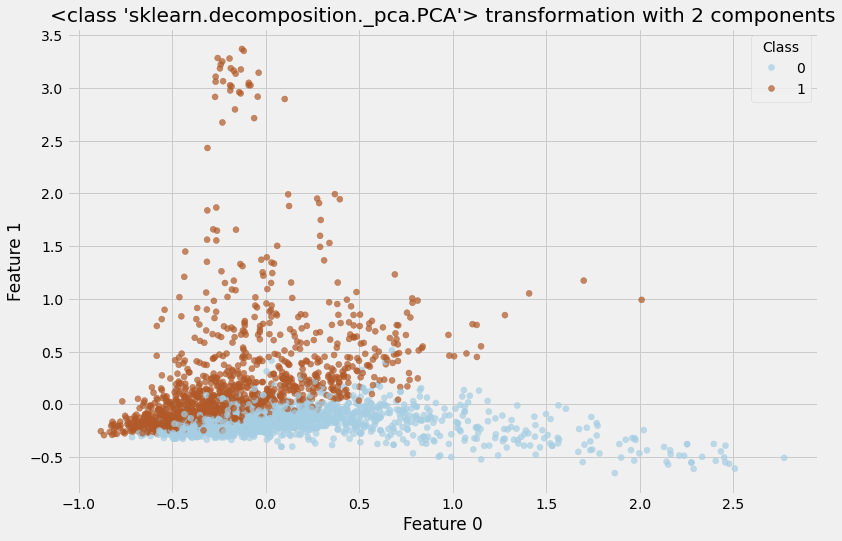

In [43]:
# Apply and plot PCA in 2 dimensions
fit_and_plot_dim_red(PCA, full_data, components=2)

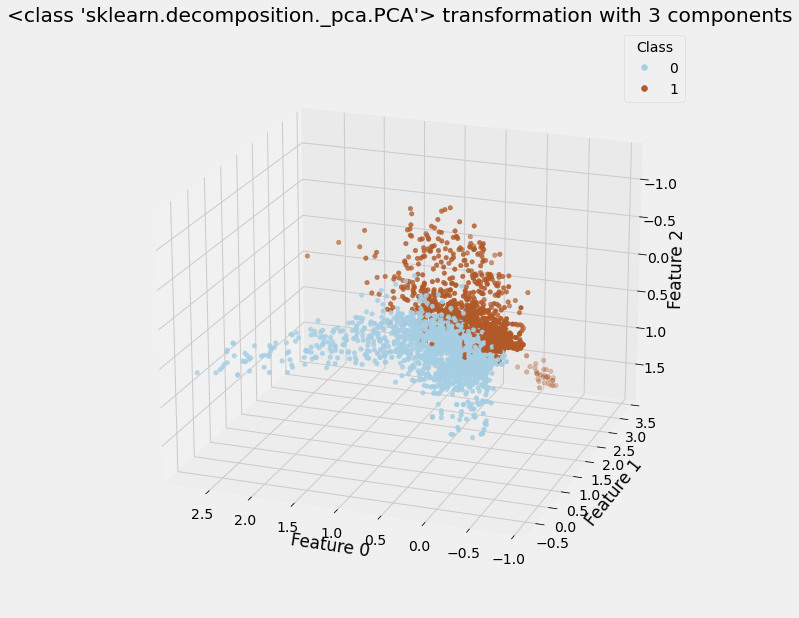

In [44]:
# Apply and plot PCA in 3 dimensions
fit_and_plot_dim_red(PCA, full_data, view=[-160, 70], components=3)

/Users/cudemans/miniforge3/envs/data_analysis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cudemans/miniforge3/envs/data_analysis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


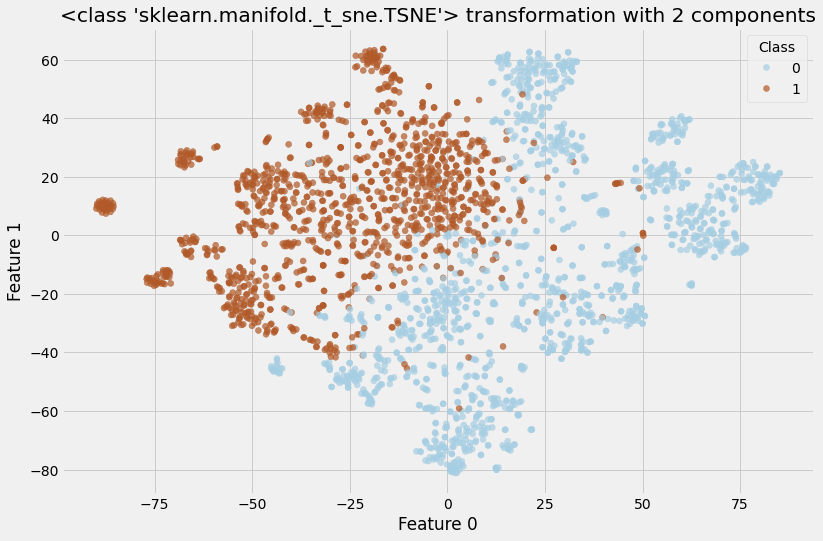

In [45]:
# Apply and plot t-sne in 2 dimensions
fit_and_plot_dim_red(TSNE, full_data, components=2)

/Users/cudemans/miniforge3/envs/data_analysis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cudemans/miniforge3/envs/data_analysis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


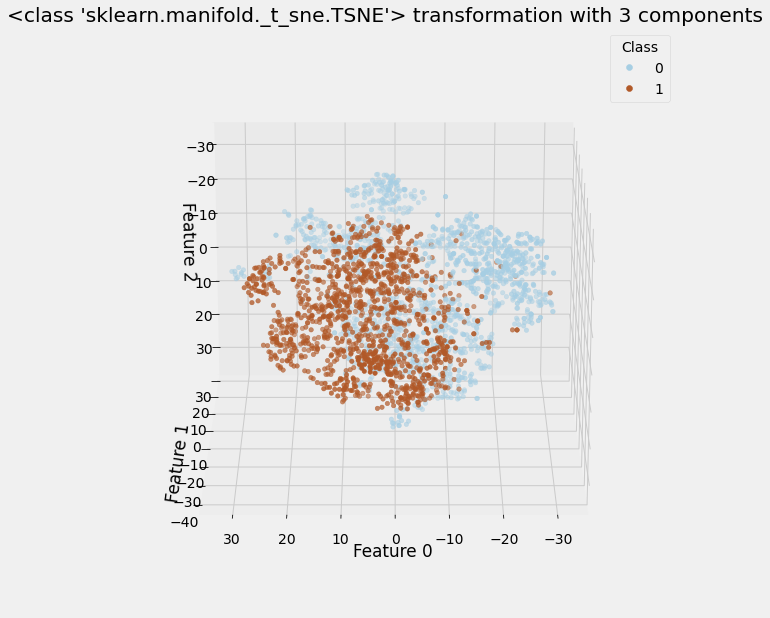

In [46]:
# Apply and plot t-sne in 3 dimensions
fit_and_plot_dim_red(TSNE, full_data, view=[-160, 90], components=3)

Using these dimensionality reduction techniques we can see that there is a clear separation between classes. This could indicate that a reasonably simple model could be used later to classify the data into real and fake news. We can now use these transformations to create new sets of data that can be used later.

In [47]:
def transform_data(method, dataset, components):

    """
    Applies selected dimensionality reduction technique
    :param method: Dimensionality reduction technique (PCA or t-SNE)
    :param dataset: Pandas dataframe to use as input
    :param components: The number of dimensions to reduce to
    :return: Pandas dataframe with features and target
    """

    # Copy dataset
    df = dataset.copy()

    # Instantiate dimensionality reducer
    dim_reduction = method(n_components=components, random_state=42)

    # Shuffle the dataset
    shuffled = df.sample(n=len(df), random_state=42)

    # Set up X, y variables
    X = shuffled.iloc[:, 4:]
    y = (shuffled['class']
            .map({'real': 0, 'fake': 1})
            .reset_index(drop=True))

    # Transform input data
    transformed = dim_reduction.fit_transform(X)

    columns = [f"feature_{x}" for x in range(components)]

    # Create dataframe from transformed data
    transformed_df = pd.DataFrame(transformed, columns=columns)

    return pd.concat([transformed_df, y], axis=1)


In [48]:
# Transform data to lower dimensions - tsne needs to have fewer than 4 components
transformed_pca_10d = transform_data(PCA, full_data, 10)
transformed_tsne_2d = transform_data(TSNE, full_data, 2)

/Users/cudemans/miniforge3/envs/data_analysis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cudemans/miniforge3/envs/data_analysis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Model selection

Now that the data is fully processed, and we have identified a clear separation between classes, we can train several models and evaluate their performance on the data. I will be using five different models to achieve this:

1. **Multinomial Naive Bayes:** This will be used as a baseline model. Multinomial Naive Bayes is an algorithm that is widely used for text classification tasks.
2. **Logistic Regression:** Another simple model whose text classification abilities will be tested.
3. **Random Forest:** This algorithm can also be used to gauge the importance of each of the features, which could be used to fine time other models.
4. **Support Vector Machines**
5. **k-Nearest Neighbours**

To train these models, I will split the data into train, test, and validation sets. In the next section we will compare the performance of all the classifiers. For training, I will be using the dataset with reduced dimensionality, in particular, a dataset reduced by PCA that now has 10 features.

In addition, I will be running a grid search for in order to find the best hyperparameters for each model.

The function below splits the data before training into validation, training, and test sets.


In [49]:
def split_data(dataset, target_column, target_needs_mapping=False):

    """
    Splits data into validation, train, and test sets
    :param dataset: Pandas dataframe to use as input
    :param target_column: Columns containing target variable
    :param target_needs_mapping: Flag to indicate whether classes have been mapped to numeric values
    :return: validation, train, and test sets
    """
    # Create a copy if the dataframe
    df = dataset.copy()

    # Shuffle the data in the dataset
    shuffled = df.sample(n=len(df), random_state=42).reset_index(drop=True)

    # Map class values to numbers
    if target_needs_mapping:
        shuffled[target_column] = shuffled[target_column].map({'real': 0, 'fake': 1})
    else:
        shuffled[target_column] = shuffled[target_column]

    # Create validation set
    _validation = shuffled.iloc[-75:, :]

    # Subset not validation samples
    not_validation = shuffled.iloc[~shuffled.index.isin(_validation.index), :]

    # Split not_validation into data and target variables
    X = (not_validation
            .drop('class', axis = 1)
            .select_dtypes(include='number'))

    y = not_validation['class']

    # Split into training and test sets
    _X_train, _X_test, _y_train, _y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return _validation, _X_train, _X_test, _y_train, _y_test


Create validation, training, and test sets. I have decided to use the PCA-created features as there is slightly more information in them.

In [50]:
validation, X_train, X_test, y_train, y_test = split_data(transformed_pca_10d, 'class')

Since we will be using grid search to find the best hyperparameters, I will create a function that can be re-used for each model to find the best combination of parameters.

In [51]:
def search_best_hyperparameters(model, x_train, y_train, params):

    """
    Finds the best combination of hyperparamters for a given model
    :param model: The model whose hyperparameters will be tested
    :param x_train: X_train data
    :param y_train: y_train data
    :param params: Dictionary of parameters to be tested
    :return: None, prints best hyperparameters
    """

    # Instantiate grid search with five-fold cross validation
    model_clf = GridSearchCV(estimator=model, param_grid=params,
                             scoring=['r2', 'accuracy', 'recall'],
                             refit='recall', cv=5, verbose=1)

    # Fist the model
    model_clf.fit(x_train, y_train)

    # Print the best combination of hyperparameters
    print(model_clf.best_estimator_)

#### Multinomial Naive Bayes

This algorithm is widely used in text classification but requires all values to be non-negative. The output of PCA for dimensionality reduction contains negative values, so I have added a constant value to all of those in the training and test splits. This will ensure the model accepts to values.

First, we need to find the best model given multiple values of alpha:

In [52]:
# Multinomial Naive Bayes test parameters
multi_nb_search_params = {
    "alpha": [0.1, 0.5, 0.8, 1, 2, 5]
}

# Instantiate model
multi_nb = MultinomialNB()

# Initiate grid search
search_best_hyperparameters(multi_nb, X_train + 1.5, y_train, multi_nb_search_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
MultinomialNB(alpha=0.1)


Now we can use the best performing hyperparameters to tune the model

In [53]:
# Instantiate the model
multi_nb_tuned = MultinomialNB(alpha=0.1)

# Fit to the data
multi_nb_tuned.fit(X_train + 1.5, y_train)

MultinomialNB(alpha=0.1)

#### Logistic regression

Since logistic regression is a relatively simple model, I won't be tuning the hyperparameters. Rather, I will be using the default values when creating the model.

In [54]:
# Instantiate model
log_reg = LogisticRegression()

# Fit to data
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Random Forest

Random forests are a lot more complex than the previous two models we have trained and will require grid search to find the best parameters. We will also need to include some parameters to stop the model getting too complex. This can be done by limiting the maximum depth of each of the trees in the ensemble. The code below takes some time to run as the model will be fit more than 500 times. The total number of fits can be calculated by:

`len(n_estimators) * len(max_depth) * 5`

Where 5 is the number of k fold splits.

In [55]:
# Random Forest test parameters
r_forest_search_params = {
    "n_estimators": [50, 100, 200, 300, 400, 500],
    "max_depth": list(range(1, 20))
}

r_forest = RandomForestClassifier(random_state=42)

search_best_hyperparameters(r_forest, X_train, y_train, r_forest_search_params)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)


In [56]:
# Instantiate the model with the above parameters
r_forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Fit the model to the data
r_forest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

#### SVC

Moving on SVC, this classifier will also require some limits to control for complexity. This can be done by changing `C`, the regularisation parameter.

In [57]:
# SVC test parameters
svc_search_params = {
    "C": [0.1, 0.5, 1, 2, 3, 4, 5]
}

# Instantiate model
svc = SVC(random_state=42)

# Perform grid search
search_best_hyperparameters(svc, X_train, y_train, svc_search_params)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
SVC(C=4, random_state=42)


In [58]:
# Instantiate the model with the above parameters - probability flag allows us to plot the ROC curve later
svc_tuned = SVC(C=4, random_state=42, probability=True)

# Fit the model to the data
svc_tuned.fit(X_train, y_train)

SVC(C=4, probability=True, random_state=42)

#### K-nearest Neighbours

For K-nearest neighbours, we can tune the number of neighbours we want to use in the model.

In [59]:
# KNN test parameters
knn_search_params = {
    "n_neighbors": list(range(1, 15))
}

# Instantiate the model
knn = KNeighborsClassifier()

# Perform grid search
search_best_hyperparameters(knn, X_train, y_train, knn_search_params)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
KNeighborsClassifier(n_neighbors=7)


In [60]:
# Instantiate the model with the above parameters
knn_tuned = KNeighborsClassifier(n_neighbors=7)

# Fit to the data
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### Model Evaluation

There are now five trained models to be evaluated. I will be using several statistical measures to evaluate the performance of the models. These include:

1. Accuracy
2. Recall
3. Precision
4. F1 score

In addition, I will be plotting the ROC curves and confusion matrices for each of the models.

The code below calculates the performance metrics for a given model. We will use it to calculate the metrics for each classifier.

In [61]:
def compile_model_data(model_name, model, x_test, y_test):

    """
    Compiles performance metrics for a given model
    :param model_name: The name of the model being used
    :param model: The trained model
    :param x_test: X_test data
    :param y_test: y_test data
    :return: Pandas dataframe of summary metrics
    """

    # Get predictions for the test data
    pred = model.predict(x_test)

    # Get accuracy
    acc = model.score(x_test, y_test)
    # Get recall
    recall = recall_score(y_test, pred)
    # Get precision
    precision = precision_score(y_test, pred)
    # Get f1 score
    f1 = f1_score(y_test, pred)

    # Return dataframe of these metrics
    return pd.DataFrame([{"model": model_name, "accuracy": acc, "recall": recall,
                          "precision": precision, "f1-score": f1}])

**Apply computations to each model to get performance indicators**

In [62]:
# Compile MultinomialNB data
multi_nb_data = compile_model_data("MultinomialNB", multi_nb_tuned, X_test, y_test)

# Compile Logistic Regression data
log_reg_data = compile_model_data("Logistic Regression", log_reg, X_test, y_test)

# Compile Random Forest data
r_forest_data = compile_model_data("Random Forest", r_forest_tuned, X_test, y_test)

# Compile SVC data
svc_data = compile_model_data("SVC", svc_tuned, X_test, y_test)

# Compile KNN data
knn_data = compile_model_data("KNN", knn_tuned, X_test, y_test)

pd.concat([multi_nb_data, log_reg_data, r_forest_data, svc_data, knn_data]).reset_index(drop=True)

,model,accuracy,recall,precision,f1-score
0,MultinomialNB,0.714019,0.372951,1.000000,0.543284
1,Logistic Regression,0.979439,0.979508,0.975510,0.977505
2,Random Forest,0.985047,0.983607,0.983607,0.983607
3,SVC,0.986916,0.987705,0.983673,0.985685
4,KNN,0.981308,0.979508,0.979508,0.979508


In [63]:
def plot_roc(y_true, data, model, model_name, ax, first_plot=False):

    """
    Plots the ROC curve for a trained model
    :param model_name: The name of the model being used
    :param model: The trained model
    :param y_true: Actual y values
    :param data: X data to predict on
    :param ax: The plt axis to add the plot to
    :param first_plot: Flag true on the first plot to only show the legend there
    :return: Plot to be added to a grid of subplots
    """
    # Calculate prediction probabilities
    pred_proba = model.predict_proba(data)[:, 1]

    # Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_true, pred_proba)

    # Create ROC dataframe
    roc_df = pd.DataFrame({'false positive rate': fpr, 'true negative rate': tpr})

    # Calculate are under the curve
    auc = roc_auc_score(y_true, pred_proba)

    # Plot curve
    ax.plot(roc_df['false positive rate'], roc_df['true negative rate'], label='ROC curve')
    ax.set_title(f"ROC for {model_name} AUC={auc :.4f}")
    ax.set_xlabel("False positive rate")
    ax.set_ylabel("True positive rate")

    # Plot random model
    ax.plot([0, 1], ls="--", label="Random classifier")

    # Plot legend only on first graphic in grid
    ax.legend() if first_plot else None

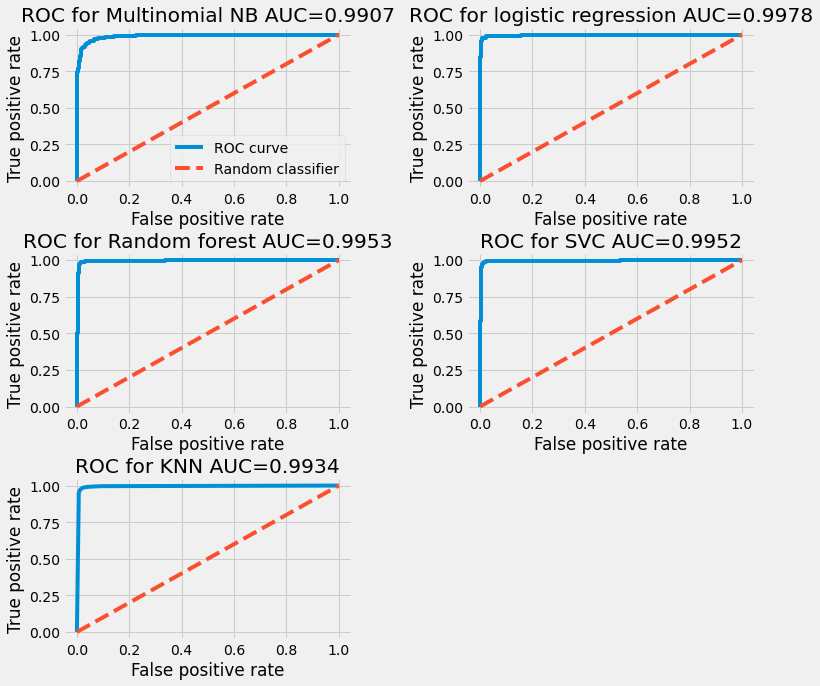

In [64]:
# Plot ROC curves and calculate the area under the curve

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(12,10))

# Plot ROC curve for each model
plot_roc(y_test, X_test, multi_nb_tuned, "Multinomial NB", axes[0, 0], first_plot=True)
plot_roc(y_test, X_test, log_reg, "logistic regression", axes[0, 1])
plot_roc(y_test, X_test, r_forest_tuned, "Random forest", axes[1, 0])
plot_roc(y_test, X_test, svc_tuned, "SVC", axes[1, 1])
plot_roc(y_test, X_test, knn_tuned, "KNN", axes[2, 0])

# Hide grids for empty plot
axes[2,1].set_visible(False)

# Adjust spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.05,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



We can now plot the confusion matrix for each classifier. These will show us where the correct classifications occurred and there the misclassifications took place.

In [65]:
def plot_confusion_matrix(y_true, y_pred, classifier, ax):

    """
    Plots the confusion matrix for a trained model
    :param y_pred: Predicted values from a model
    :param y_true: Actual y values
    :param classifier: Model for which to create a confusion matrix
    :param ax: The plt axis to add the plot to
    :return: Plot to be added to a grid of subplots
    """
    # Calculate the confusion matrix
    con_matrix = confusion_matrix(y_true, y_pred)

    # Create a display of the confusion matrix
    display_con_matrix = ConfusionMatrixDisplay(con_matrix, display_labels=['real', 'fake'])

    # Plot the confusion matrix
    display_con_matrix.plot(cmap=plt.cm.Blues, ax=ax)
    ax.grid(False)
    ax.set_title(f"{classifier}")



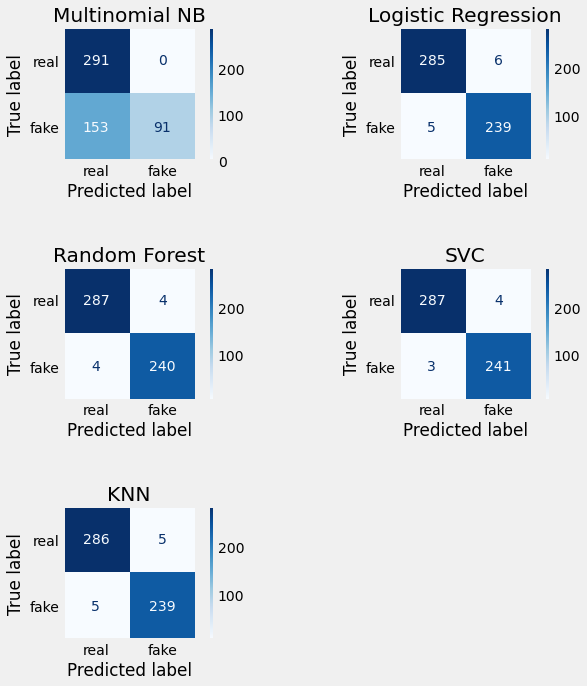

In [66]:
# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(16,10))

# Plot confusion matrix for each classifier
plot_confusion_matrix(y_test, multi_nb_tuned.predict(X_test), "Multinomial NB", axes[0, 0])
plot_confusion_matrix(y_test, log_reg.predict(X_test), "Logistic Regression", axes[0, 1])
plot_confusion_matrix(y_test, r_forest_tuned.predict(X_test), "Random Forest", axes[1, 0])
plot_confusion_matrix(y_test, svc_tuned.predict(X_test), "SVC", axes[1, 1])
plot_confusion_matrix(y_test, knn_tuned.predict(X_test), "KNN", axes[2, 0])
axes[2,1].set_visible(False)

# Adjust spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.05,
                    right=0.6,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)



## 6. Conclusion

### Outcomes

The aim of this project has been to gauge how effective NLP techniques coupled with classical machine learning models are at detecting fake news articles. In this project I was successfully able to create a pipeline that allowed me source, analyse, and model data to detect fake news. I successfully was able to:

1. Scrape new text data to add to the data I originally acquired in my project proposal.
2. Clean the newly acquired data
3. Engineer the text features, so they can be used as inputs to several machine learning models.
4. Train five machine learning models
5. Use several classification metrics including accuracy, recall, f1 score, area under the curve, and visualisations to assess the efficacy of each of the trained models.

As a final step, we can test each of the classifiers on the holdout validation set. The results can be found below:

In [67]:
# Split validation set into X and y
X_val = validation.drop('class', axis=1)
y_val = validation['class']

# Compile MultinomialNB data
multi_nb_val = compile_model_data("MultinomialNB", multi_nb_tuned, X_val, y_val)

# Compile Logistic Regression data
log_reg_val = compile_model_data("Logistic Regression", log_reg, X_val, y_val)

# Compile Random Forest data
r_forest_val = compile_model_data("Random Forest", r_forest_tuned, X_val, y_val)

# Compile SVC data
svc_val = compile_model_data("SVC", svc_tuned, X_val, y_val)

# Compile KNN data
knn_val = compile_model_data("KNN", knn_tuned, X_val, y_val)

pd.concat([multi_nb_val, log_reg_val, r_forest_val, svc_val, knn_val]).reset_index(drop=True)

,model,accuracy,recall,precision,f1-score
0,MultinomialNB,0.720000,0.363636,1.000000,0.533333
1,Logistic Regression,0.973333,0.969697,0.969697,0.969697
2,Random Forest,0.973333,0.969697,0.969697,0.969697
3,SVC,0.973333,0.969697,0.969697,0.969697
4,KNN,0.973333,1.000000,0.942857,0.970588


### Findings

With adequate text preprocessing, classical machine learning models are able to successfully learn the features of fake news articles to predict on data they have not seen before. Here are a summary of my findings:

1. Multinomial Naive Bayes, which served as my baseline model, performed the worst out of all the models that I trained. It was able to reach an accuracy of around 71% on the test set, which is better than a chance model but lower than my expectations. It had a hard time distinguishing fake news articles from real ones. Using this model resulted in many false positives but no false negatives, mislabeling 153 reliable news articles as fake.
2. The majority of the other models performed excellently, including simple models such as logistic regression and k-nearest neighbours.
3. The best performing model was SVC, reaching and accuracy of more than 98% on the test set, an f1-score of more than 98%, and an AUC of 99.5 on the test data.
4. The random forest was able to reach high levels of accuracy, recall, and precision. However, some regularisation was needed to stop overfitting to the training data.
5. Logistic regression also fared well, on par with SVC on the validation set.
6. High levels are accuracy are achievable the highly possible with the correct text processing pipeline, especially vectorisation. For this project the two most important vectorisation steps I took were calculating TF-IDF and cosine similarity scores.

### Limitations

Despite the models achieving high levels of accuracy, there are several limitations that could work to sway the reliability of this work, primarily to do with the data.

1. **Data sourcing:** While I did my best to include a large number of fake news sources, the reliable new data come from just one source. Traits resulting from strictly adhering to a writing style guide could have played a role in the models learning the features of the BBC dataset as opposed to learning the telltale signs of a fake news story. I would have liked to include a wider variety of sources of reliable data, but I did not want to scrape the websites of journalistic outlets without permission.
2. **Geography of news topics:** The primary source of fake news articles were US-based outlets, while the reliable news data came from the BBC. The variability in topics that matter to people in the US and the UK could have also been a contributing factor to the classifiers' abilities to pick up fake and real news.

### Future research

An interesting area to explore in the future would be the choice of vectorisation method and model performance. I included cosine similarity scores in the dataset after reading that they could help to reach higher levels of accuracy when training a text classification model. However, I think quantifying this difference could be an interesting are of research. This could be done by running a similar experiment to the one in this project but only including TF-IDF scores in training, then only running cosine similarity scores, and then lastly running both to gauge which works best when working with text classification problems.

### References

[1] Ana Lucia Schmidt, Fabiana Zollo, Michela Del Vicario, Alessandro Bessi, Antonio Scala, Guido Caldarelli, H. Eugene Stanley, and Walter Quattrociocchi "Anatomy of news consumption on Facebook," in PNAS, vol. 114, no 12, pp. 3035-3039, 2017 doi: 10.1073/pnas.1617052114.

[2] Andrea Gasparetto, Matteo Marcuzzo, Alessandro Zangari, and Andrea Albarelli, "A Survey on Text Classification Algorithms: From Text to Predictions" in Information, vol. 13, doi: 10.3390/info13020083

[3] Michela Del Vicario, Walter Quattrociocchi, Antonio Scala, and Fabiana Zollo. "Polarization and Fake News: Early Warning of Potential Misinformation Targets," ACM Trans. Web 13, 2, Article 10 (March 2019), doi: 10.1145/3316809

[4] https://www.ibm.com/cloud/learn/natural-language-processing

[5] https://www.techtarget.com/whatis/definition/Zipfs-Law

[6] Sanket Mhatre and Akhil Masurkar, "A Hybrid Method for Fake News Detection using Cosine Similarity Scores," 2021, *IEEE International Conference on Communication information and Computing Technology (ICCICT)*, Mumbai, India, IEEE

[7] https://towardsdatascience.com/higher-accuracy-and-less-process-time-in-text-classification-with-lda-and-tf-idf-d2d949e344c3

[8] https://medium.com/analytics-vidhya/text-classification-using-lda-35d5b98d4f05

[9] Student, Anon., 2022. Project: Disinformation detector project proposal, Cape Town. Attached: cw1_submission.pdf


### Resources

Plot ROC curves
https://www.projectpro.io/recipes/plot-roc-curve-in-python#mcetoc_1g0c8pq5cd

Create Hapax Legoma
https://tedboy.github.io/nlps/generated/generated/nltk.FreqDist.hapaxes.html

Calculating TF-IDF
https://medium.com/analytics-vidhya/demonstrating-calculation-of-tf-idf-from-sklearn-4f9526e7e78b

Calculating cosine similarity
https://studymachinelearning.com/cosine-similarity-text-similarity-metric/

Plot confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator

Text processing in Python
https://towardsdatascience.com/text-processing-in-python-29e86ea4114c





#### Trusted news data source

[BBC News Classification competition](https://www.kaggle.com/competitions/learn-ai-bbc/data)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column = pd.Series([1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1])

In [15]:
list(column.value_counts().index)

[1, 0]

Text(0.5, 1.0, 'TItl')

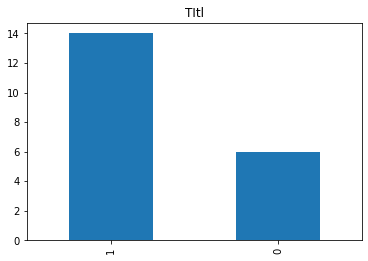

In [19]:
column.value_counts().plot(kind='bar')
